## Omoju Miller Dissertation Data Analysis 
### Factors that lead students to choose CS major at Cal

In [4]:
# inline graphs
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import sys
sys.path.append('helperFunctions/')


In [8]:
from pandas import DataFrame
import pandas as pd 
import HelperFunctionDataAnalysis as myHelper # helper functions to display images

#### Read in csv files and define dataframe object.

In [10]:
dataPath = '/Users/omojumiller/Dropbox/Research/DissertationSubmission/'

cs10Spring_df = pd.read_csv(dataPath+'Data/CS10_Pre_Responses_Spring2015.csv') 
cs10Spring_pdf = pd.read_csv(dataPath+'Data/CS10_Post_Responses_Spring2015.csv')
cs61a = pd.read_csv(dataPath+'Data/CS61A_Responses_Fall2014.csv')


In [24]:
strs = "In my project, I have a bunch of strings that are read in from a file. Most of them, when printed in the command console, exceed 80 characters in length and wrap around, looking ugly."

len(strs)

183

Update column names.

In [33]:
#Get the description of the column items
dd = pd.read_csv(dataPath+'Data/Data_Describe.csv')
dd.columns = ['dataDecription', 'dataKeys']
dataDescription = {}

print "-"* 32, 'Data Description', "-"
for i, row in dd.iterrows():
    lineLength = len(row.dataDecription)
    if (lineLength > 80):
        lineOneEnd = 81
        print"{:15}{:20}".format(row.dataKeys, row.dataDecription[:lineOneEnd])
        print"{:15}{:20}".format('', row.dataDecription[lineOneEnd:])
    else:
         print"{:15}{:20}".format(row.dataKeys, row.dataDecription)
    
    dataDescription[dd.dataKeys[i]] = dd.dataDecription[i]
    
print '\n'
del dataDescription['name_2']
del dataDescription['name_1']
del dataDescription['major']
del dataDescription['morecs']
del dataDescription['timestamp']
del dataDescription['consent']
del dataDescription['mtr_2']
del dataDescription['mtr_3']
del dataDescription['mtr_1']
del dataDescription['prcs_3']
del dataDescription['prcs_5']
del dataDescription['prcs_4']
del dataDescription['prcs_2']
del dataDescription['prcs_1']
del dataDescription['reason_class']
del dataDescription['grade']
del dataDescription['gender']
del dataDescription['prepared']


dataDescription['atct_1'] = 'I am good at solving a problem by thinking \nabout similar problems I have solved before.'
dataDescription['atct_7'] = 'I am good at ignoring irrelevant details to solve a problem.'
tmp = '\n with people from diverse backgrounds.'
dataDescription['cltrcmp_2'] = 'I have good cultural competence, or the ability to interact effective' + tmp



atcs_1         I like to use computer science to solve problems.
atcs_2         I can learn to understand computing concepts.
atcs_3         I can achieve good grades (C or better) in computing courses.
atcs_4         I do not like using computer science to solve problems.
atcs_5         I am confident that I can solve problems by using computation
atcs_6         The challenge of solving problems using computer science appeals to me.
atcs_7         I am comfortable with learning computing concepts.
atcs_8         I am confident about my abilities with regards to computer science.
atcs_9         I do think I can learn to understand computing concepts.
atcsgender_1   Women are less capable of success in CS than men.
atcsgender_2   Women are smarter than men.
atcsgender_3   Men have better math and science abilities than women.
atcsjob_1      Knowledge of computing will allow me to secure a good job.
atcsjob_2      My career goals do not require that I learn computing skills.
atct_1      

In [11]:
cs10Spring_df.columns = ['timestamp',
'consent','gender','reason_class','major','atcs_1','atcsjob_1','atcs_2','atcsjob_2','atcsgender_1',
'atcs_3','atcs_4','atcs_5','atcsgender_2','atcs_6','atcs_7','atcs_8','atcs_9','atcsgender_3',
'atct_1','atct_2','atct_3','atct_4','atct_5','atct_6','atct_7','atct_8','clet_1','clet_2','grade',
'mtr_1','mtr_2','mtr_3','blg_1','blg_2','blg_3','blg_4','cltrcmp_1',
'cltrcmp_2','classmtr','prcs_1','prcs_2','prcs_3','prcs_4','prcs_5','prepared','morecs','name_1', 'name_2']


In [12]:
cs10Spring_pdf.columns = ['timestamp',
'consent','gender','reason_class','major','atcs_1','atcsjob_1','atcs_2','atcsjob_2','atcsgender_1',
'atcs_3','atcs_4','atcs_5','atcsgender_2','atcs_6','atcs_7','atcs_8','atcs_9','atcsgender_3',
'atct_1','atct_2','atct_3','atct_4','atct_5','atct_6','atct_7','atct_8','clet_1','clet_2','grade',
'mtr_1','mtr_2','mtr_3','blg_1','blg_2','blg_3','blg_4','cltrcmp_1',
'cltrcmp_2','classmtr','prcs_1','prcs_2','prcs_3','prcs_4','prcs_5','prepared','morecs','name_1',
                    'snap_python','hiphop_d1','hiphop_d2','song_ct']


In [13]:
cs61a.columns = ['timestamp','consent','gender',
'reason_class','major','atcs_1','atcsjob_1','atcs_2','atcsjob_2','atcsgender_1','atcs_3','atcs_4',
'atcs_5','atcsgender_2','atcs_6','atcs_7','atcs_8','atcs_9','atcsgender_3','atct_1',
'atct_2','atct_3','atct_4','atct_5','atct_6','atct_7','atct_8','clet_1','clet_2','grade',
'mtr_1','mtr_2','mtr_3','blg_1','blg_2','blg_3','blg_4','cltrcmp_1','cltrcmp_2','classmtr',
'prcs_1','prcs_2','prcs_3','prcs_4','prcs_5','prepared','morecs','priorcs10','name']


Lets go ahead and filter out missing data.

If the consent value is **"I disagree"**, then drop that row from the data set.

In [14]:
cs61a = cs61a[cs61a.consent == 'I agree']
cs10Spring_df = cs10Spring_df[cs10Spring_df.consent == 'I agree']
cs10Spring_pdf = cs10Spring_pdf[cs10Spring_pdf.consent == 'I agree']


In [15]:
# Add all the data from CS10 together since I am not doing before and after 

frames = [cs10Spring_df, cs10Spring_pdf]
cs10 = pd.concat(frames, keys=['pre', 'post'])


Lets filter out the data based on gender

In [16]:
cs10_female = cs10[cs10.gender == 'Female']
cs10_male = cs10[cs10.gender == 'Male']
cs10_female = cs10_female.reset_index(drop=True)
cs10_male = cs10_male.reset_index(drop=True)


cs61a_female = cs61a[cs61a.gender == 'Female']
cs61a_male = cs61a[cs61a.gender == 'Male']
cs61a_female = cs61a_female.reset_index(drop=True)
cs61a_male = cs61a_male.reset_index(drop=True)

print ('%d male students, and %d female students consented to participate in the research CS10' 
       % (len(cs10_male), len(cs10_female)))
print ('%d male students, and %d female students consented to participate in the research CS61A' 
       % (len(cs61a_male), len(cs61a_female)))



170 male students, and 217 female students consented to participate in the research CS10
324 male students, and 171 female students consented to participate in the research CS61A


Create the dimension that we are interested in investigating.

In [17]:
atcs = ['atcs_1', 'atcs_2', 'atcs_3', 'atcs_4', 'atcs_5', 
        'atcs_6', 'atcs_7', 'atcs_8', 'atcs_9']# self reported attitude about CS competency
atcsgender = ['atcsgender_1', 'atcsgender_2', 'atcsgender_3'] 
atcsjob = ['atcsjob_1', 'atcsjob_2'] 
atct = ['atct_1', 'atct_2', 'atct_3', 'atct_4', 
        'atct_5', 'atct_6', 'atct_7', 'atct_8'] # Self reported attitudes about computational thinking
blg = ['blg_1', 'blg_2', 'blg_3', 'blg_4'] # Sense of belonging in the class room
clet = ['clet_1', 'clet_2'] # Social implications and ethics
cltrcmp = ['cltrcmp_1', 'cltrcmp_2'] # Culutral competency
mtr = ['mtr_1', 'mtr_2', 'mtr_3'] # CS Mentors
prcs = ['prcs_1', 'prcs_2', 'prcs_3', 'prcs_4', 'prcs_5'] # Prior CS Exposure
gender = 'gender'
major = 'major'
priorcs10 = 'priorcs10' # had taken CS10 prior



In [18]:
# get students from 61a who have had no prior cs experience

# prcs_2: Did you have any exposure to Computer Science before UC Berkeley?
cs61a_NO_CS = cs61a[cs61a.prcs_2 == 'No']
cs10_NO_CS = cs10[cs10.prcs_2 == 'No']




cs61a_NO_CS_female = cs61a_female[cs61a_female.prcs_2 == 'No']
print 'There are %d women without prior CS exposure who are taking 61a' % cs61a_NO_CS_female.prcs_2.value_counts()
cs61a_NO_CS_male = cs61a_male[cs61a_male.prcs_2 == 'No']
print 'There are %d men without prior CS exposure who are taking 61a\n' % cs61a_NO_CS_male.prcs_2.value_counts()


cs10_NO_CS_female = cs10_female[cs10_female.prcs_2 == 'No']
print'There are %d women without prior CS exposure who are taking cs10' % cs10_NO_CS_female.prcs_2.value_counts()
cs10_NO_CS_male = cs10_male[cs10_male.prcs_2 == 'No']
print'There are %d men without prior CS exposure who are taking cs10\n' % cs10_NO_CS_male.prcs_2.value_counts()

print ('There are %d students without prior CS exposure in this study\n' 
% ((cs61a_NO_CS_male.prcs_2.value_counts()+cs10_NO_CS_male.prcs_2.value_counts()) \
   + (cs61a_NO_CS_female.prcs_2.value_counts()+cs10_NO_CS_female.prcs_2.value_counts())))

print 'women total %d \n' % (cs61a_NO_CS_female.prcs_2.value_counts()+cs10_NO_CS_female.prcs_2.value_counts())
print 'men total %d \n' % (cs61a_NO_CS_male.prcs_2.value_counts()+cs10_NO_CS_male.prcs_2.value_counts())


There are 85 women without prior CS exposure who are taking 61a
There are 101 men without prior CS exposure who are taking 61a

There are 172 women without prior CS exposure who are taking cs10
There are 122 men without prior CS exposure who are taking cs10

There are 480 students without prior CS exposure in this study

women total 257 

men total 223 



In [19]:
# get students from 61a who have had prior cs experience
# prcs_2: Did you have any exposure to Computer Science before UC Berkeley?
cs61a_CS = cs61a[cs61a.prcs_2 == 'Yes']
cs10_CS = cs10[cs10.prcs_2 == 'Yes']

cs10_CS_female = cs10_female[cs10_female.prcs_2 == 'Yes']
print'There are %d women WITH prior CS exposure who are taking cs10' % cs10_CS_female.prcs_2.value_counts()
cs10_CS_male = cs10_male[cs10_male.prcs_2 == 'Yes']
print'There are %d men WITH prior CS exposure who are taking cs10\n' % cs10_CS_male.prcs_2.value_counts()

cs61a_CS_female = cs61a_female[cs61a_female.prcs_2 == 'Yes']
print 'There are %d women WITH prior CS exposure who are taking 61a' % cs61a_CS_female.prcs_2.value_counts()
cs61a_CS_male = cs61a_male[cs61a_male.prcs_2 == 'Yes']
print 'There are %d men WITH prior CS exposure who are taking 61a\n' % cs61a_CS_male.prcs_2.value_counts()


print ('There are %d students WITH prior CS exposure in this study\n' % 
((cs61a_CS_male.prcs_2.value_counts()+cs10_CS_male.prcs_2.value_counts()) \
 + (cs61a_CS_female.prcs_2.value_counts()+cs10_CS_female.prcs_2.value_counts())))

print 'women total %d \n' % (cs61a_CS_female.prcs_2.value_counts()+cs10_CS_female.prcs_2.value_counts())
print 'men total %d \n' % (cs61a_CS_male.prcs_2.value_counts()+cs10_CS_male.prcs_2.value_counts())


There are 45 women WITH prior CS exposure who are taking cs10
There are 48 men WITH prior CS exposure who are taking cs10

There are 86 women WITH prior CS exposure who are taking 61a
There are 223 men WITH prior CS exposure who are taking 61a

There are 402 students WITH prior CS exposure in this study

women total 131 

men total 271 



In [20]:
# Test for statistical signifance
# Use non-parametric alternative to the t-test Mann-Whitney U test because we have ordinal data.
# Likert scale is ordinal and not normally distributed
# And I can use Mann Whitney to compare unequal sample size.

import scipy.stats
z, p = scipy.stats.mannwhitneyu(cs61a.atct_5.values, cs10.atct_5.values)
                                                   
# We should usually use a two-tailed test because we have no a priori about 
# one treatment being better than the other. 
# We should therefore multiply p by two to obtain the p-value:
p_value = p * 2

print 'P value is: %.5f, with a z statistic of %.5f'% (p_value, z)

s = myHelper.stars(p)

print s
# A low P value suggests that your sample provides enough evidence 
# that you can reject the null hypothesis for the entire population.
# http://blog.minitab.com/blog/adventures-in-statistics/how-to-correctly-interpret-p-values


P value is: 0.00000, with a z statistic of 136551.00000
****


In [21]:
def genPValues(itemDimension, theCategory):
    
    #import scipy.stats
    temp =[]
    for key in itemDimension:
        CS10Temp = []   
        CS10Temp.append('cs10'+theCategory+'.'+key+'.values')
        CS61aTemp = []
        CS61aTemp.append('cs61a'+theCategory+'.'+key+'.values')

        CS10FemaleTemp = []
        CS10FemaleTemp.append('cs10'+theCategory+'_female'+'.'+key+'.values')
        CS61aFemaleTemp = []
        CS61aFemaleTemp.append('cs61a'+theCategory+'_female'+'.'+key+'.values')
        
        CS10MaleTemp = []
        CS10MaleTemp.append('cs10'+theCategory+'_male'+'.'+key+'.values')
        CS61aMaleTemp = []
        CS61aMaleTemp.append('cs61a'+theCategory+'_male'+'.'+key+'.values')
        
    
        z1, p1 = scipy.stats.mannwhitneyu(eval(CS10Temp[0]),eval(CS61aTemp[0])) 
        p_value1 = p1 * 2
        
        z2, p2 = scipy.stats.mannwhitneyu(eval(CS10FemaleTemp[0]),eval(CS61aFemaleTemp[0])) 
        p_value2 = p2 * 2
        
        z3, p3 = scipy.stats.mannwhitneyu(eval(CS10MaleTemp[0]),eval(CS61aMaleTemp[0])) 
        p_value3 = p3 * 2

        s1 = myHelper.stars(p1)
        s2 = myHelper.stars(p2)
        s3 = myHelper.stars(p3)
        
        print 'Test for significance between CS10 and CS61A\n'
        print key, '\t', dataDescription[key]
        if p_value1 < 0.05:
            print 'Class', '\t', '%.8f' % p_value1, '\t', 'Statistically Significant:',s1 
        if p_value2 < 0.05:
            print 'Female', '\t', '%.8f' % p_value2, '\t', 'Statistically Significant:', s2
        if p_value3 < 0.05:
            print 'Male', '\t', '%.8f' % p_value3, '\t', 'Statistically Significant:', s3
        print '\n'
       

In [22]:
'''
I am using this function to test for statistical significance between students with prior exposure 
and students without prior exposure

''' 
def genPValues_2(itemDimension):
    
    temp =[]
    for key in itemDimension:
        CS10_CS_Temp = []   
        CS10_CS_Temp.append('cs10_CS'+'.'+key+'.values')
        CS61a_CS_Temp = []
        CS61a_CS_Temp.append('cs61a_CS'+'.'+key+'.values')
        
        CS10_NO_CS_Temp = []   
        CS10_NO_CS_Temp.append('cs10_NO_CS'+'.'+key+'.values')
        CS61a_NO_CS_Temp = []
        CS61a_NO_CS_Temp.append('cs61a_NO_CS'+'.'+key+'.values')
        
        CS10_CS_FemaleTemp = []
        CS10_CS_FemaleTemp.append('cs10_CS_female'+'.'+key+'.values')
        CS61a_CS_FemaleTemp = []
        CS61a_CS_FemaleTemp.append('cs61a_CS_female'+'.'+key+'.values')
        
        CS10_NO_CS_FemaleTemp = []
        CS10_NO_CS_FemaleTemp.append('cs10_NO_CS_female'+'.'+key+'.values')
        CS61a_NO_CS_FemaleTemp = []
        CS61a_NO_CS_FemaleTemp.append('cs61a_NO_CS_female'+'.'+key+'.values')
        
        CS10_CS_MaleTemp = []
        CS10_CS_MaleTemp.append('cs10_CS_male'+'.'+key+'.values')
        CS61a_CS_MaleTemp = []
        CS61a_CS_MaleTemp.append('cs61a_CS_male'+'.'+key+'.values')
        
        CS10_NO_CS_MaleTemp = []
        CS10_NO_CS_MaleTemp.append('cs10_NO_CS_male'+'.'+key+'.values')
        CS61a_NO_CS_MaleTemp = []
        CS61a_NO_CS_MaleTemp.append('cs61a_NO_CS_male'+'.'+key+'.values')
    
        z_CS, p_CS = scipy.stats.mannwhitneyu(eval(CS10_CS_Temp[0]),eval(CS61a_CS_Temp[0])) 
        p_value1 = p_CS * 2
        z_NO_CS, p_NO_CS = scipy.stats.mannwhitneyu(eval(CS10_NO_CS_Temp[0]),eval(CS61a_NO_CS_Temp[0])) 
        p_value2 = p_NO_CS * 2
        
        z_CSfemale, p_CSfemale = scipy.stats.mannwhitneyu(eval(CS10_CS_FemaleTemp[0]),
                                                          eval(CS61a_CS_FemaleTemp[0])) 
        p_value3 = p_CSfemale * 2
        z_NO_CSfemale, p_NO_CSfemale = scipy.stats.mannwhitneyu(eval(CS10_NO_CS_FemaleTemp[0]),
                                                                eval(CS61a_NO_CS_FemaleTemp[0])) 
        p_value4 = p_NO_CSfemale * 2
        
        z_CSmale, p_CSmale = scipy.stats.mannwhitneyu(eval(CS10_CS_MaleTemp[0]),
                                                      eval(CS61a_CS_MaleTemp[0])) 
        p_value5 = p_CSmale * 2
        z_NO_CSmale, p_NO_CSmale = scipy.stats.mannwhitneyu(eval(CS10_NO_CS_MaleTemp[0]),
                                                            eval(CS61a_NO_CS_MaleTemp[0])) 
        p_value6 = p_NO_CSmale * 2
    

        s1 = myHelper.stars(p_CS)
        s2 = myHelper.stars(p_NO_CS)
        s3 = myHelper.stars(p_CSfemale)
        s4 = myHelper.stars(p_NO_CSfemale)
        s5 = myHelper.stars(p_CSmale)
        s6 = myHelper.stars(p_NO_CSmale)
        
        
       
        print 'Test for significance between CS10 and CS61A\n'
        print key, '\t', dataDescription[key]
        if p_value1 < 0.05:
            print 'Prior CS Class', '\t', '%.5f' % p_value1, '\t', 'Statistically Significant:',s1 
        if p_value2 < 0.05:   
            print 'NoPrior CS Class', '\t', '%.5f' % p_value2, '\t', 'Statistically Significant:', s2
        if p_value3 < 0.05:
            print 'Prior CS Female', '\t', '%.5f' % p_value3, '\t', 'Statistically Significant:', s3
        if p_value4 < 0.05:
            print 'No Prior CS Female', '\t', '%.5f' % p_value4, '\t', 'Statistically Significant:', s4
        if p_value5 < 0.05:
            print 'Prior CS Male', '\t', '%.5f' % p_value5, '\t', 'Statistically Significant:', s5
        if p_value6 < 0.05:
            print 'No Prior CS Male', '\t', '%.5f' % p_value6, '\t', 'Statistically Significant:', s6
        print '\n'
       

In [23]:
print'There are %d women WITH prior CS exposure who are taking cs10' % cs10_CS_female.prcs_2.value_counts()

There are 45 women WITH prior CS exposure who are taking cs10


In [24]:
df = cs10_CS_female[[
        'atcs_1', 'atcs_2', 'atcs_3', 'atcs_4', 'atcs_5', 'atcs_6', 'atcs_7', 'atcs_8', 'atcs_9',
         'snap_python','hiphop_d1','hiphop_d2','song_ct',
         'atct_3', 'atct_4', 'atct_5', 'atct_8'       
    ]]

In [25]:
# Test for statistical significance between students in CS10 and CS61a

#genPValues(atcs, '')
#genPValues(atcsgender, '')
#genPValues(atct,'')
#genPValues(clet,'')
#genPValues(cltrcmp,'')
genPValues(blg,'')

Test for significance between CS10 and CS61A

blg_1 	In this class, I feel I belong.
Female 	0.02153060 	Statistically Significant: *


Test for significance between CS10 and CS61A

blg_2 	In this class, I feel awkward and out of place.


Test for significance between CS10 and CS61A

blg_3 	In this class, I feel like my ideas count.
Class 	0.00001109 	Statistically Significant: ****
Female 	0.00000106 	Statistically Significant: ****
Male 	0.00600122 	Statistically Significant: **


Test for significance between CS10 and CS61A

blg_4 	In this class, I feel like I matter.
Class 	0.00000073 	Statistically Significant: ****
Female 	0.00000141 	Statistically Significant: ****
Male 	0.00074444 	Statistically Significant: ***




In [26]:
# Test for statistical significance between students with prior exposure and students 
# without prior exposure

#genPValues_2(atcs)
#genPValues_2(atcsgender)
#genPValues_2(atct)
#genPValues_2(clet)
#genPValues_2(cltrcmp)
genPValues_2(blg)

Test for significance between CS10 and CS61A

blg_1 	In this class, I feel I belong.
NoPrior CS Class 	0.00046 	Statistically Significant: ***
No Prior CS Female 	0.00209 	Statistically Significant: **
No Prior CS Male 	0.01510 	Statistically Significant: **


Test for significance between CS10 and CS61A

blg_2 	In this class, I feel awkward and out of place.
NoPrior CS Class 	0.01472 	Statistically Significant: **
No Prior CS Female 	0.02550 	Statistically Significant: *


Test for significance between CS10 and CS61A

blg_3 	In this class, I feel like my ideas count.
Prior CS Class 	0.00786 	Statistically Significant: **
NoPrior CS Class 	0.00001 	Statistically Significant: ****
Prior CS Female 	0.00048 	Statistically Significant: ***
No Prior CS Female 	0.00057 	Statistically Significant: ***
No Prior CS Male 	0.00099 	Statistically Significant: ***


Test for significance between CS10 and CS61A

blg_4 	In this class, I feel like I matter.
Prior CS Class 	0.01432 	Statistically Signi

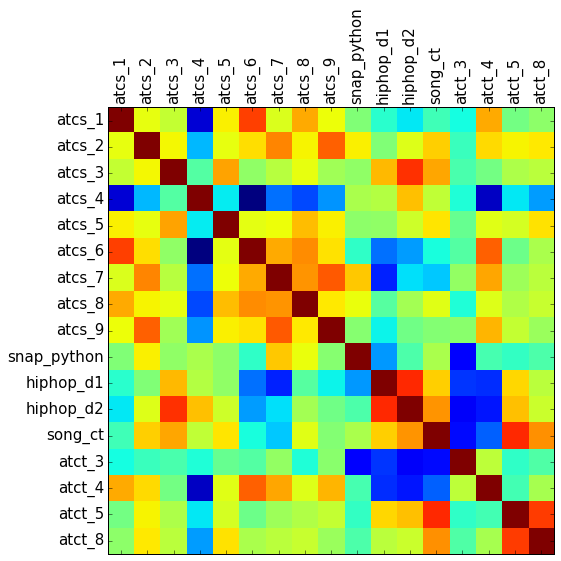

In [27]:
myFileName='Figures' + '/' + 'cs10_CS_female_DATA.pdf'
myHelper.plot_corr(df, myFileName, 8)

In [28]:
print dataDescription['atct_5']
print "%.5f" % (df['song_ct'].corr(df['atct_5']))

I know how to write computer programs
0.77585


In [29]:
theCategory = '_NO_CS'
theXLabel = '   '
itemDimension = ['blg_1', 'blg_2', 'blg_3', 'blg_4']


def getPlotDimensions(key, attr, theCategory):
    '''Function gets two arrays of datapoints.

    Input:
        key: a string for an instrument like 'blg_1'
        attr: '_male', '_female', or ''
        theCategory: a string that takes the following values ['_NO_CS', '_CS', '']
        
    Output: 
        x0: datapoints to be plotted represent cs10 information for the dimension and category
        x1: ditto cs61a
    '''
    
    temp = []
    
    temp.append('cs10'+theCategory+attr+'.'+key+'.value_counts()')
    a = eval(temp[0])
    myHelper.scaleData(a)
    x0 = myHelper.turnArray(a)
    temp = []
        
    temp.append('cs61a'+theCategory+attr+'.'+key+'.value_counts()')
    b = eval(temp[0])
    myHelper.scaleData(b)
    x1 = myHelper.turnArray(b)
    temp = []
        
    return x0, x1



In [30]:
# For the No prior CS Experience cohort

theCategory = '_NO_CS'
theXLabel = '   '
itemDimension = ['blg_1', 'blg_2', 'blg_3', 'blg_4']
attr = '_female' # the other value _male


def createThePlots(itemDimension, myFileName, theCategory, attr, theXLabel):
    
    for i in range(len(itemDimension)):
        x0, x1 = getPlotDimensions(itemDimension[i], attr, theCategory)
        myHelper.genFigure(itemDimension[i], myFileName, theCategory, theXLabel, 
                           x0, x1, dataDescription[itemDimension[i]])
        

def createTheGenderPlots(itemDimension, myFileName, theCategory, genderAttr, theXLabel):
    
    for i in range(len(itemDimension)):
        x0, x1 = getPlotDimensions(itemDimension[i], genderAttr, theCategory)
        myHelper.genGenderFigure(itemDimension[i], myFileName, theCategory, genderAttr, theXLabel, 
                                 x0, x1, dataDescription[itemDimension[i]])


In [32]:
i = 1
genderAttr = '_female'
dimension = blg[i]
myFileName = 'Figures' + '/' + dimension + genderAttr + theCategory + '.pdf'
print myFileName

Figures/blg_2_female_NO_CS.pdf


/Users/omojumiller/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/omojumiller/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


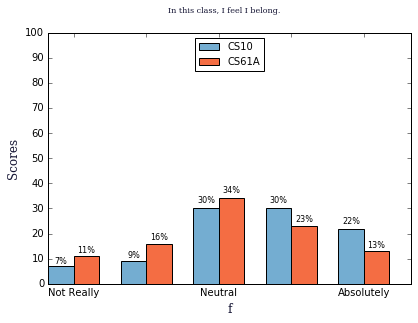

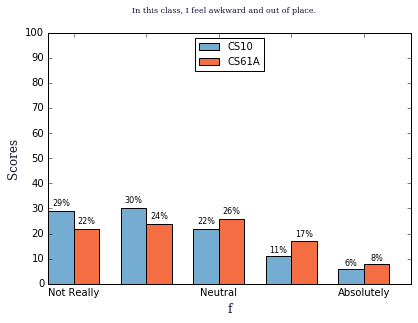

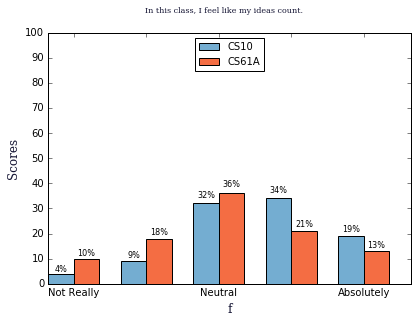

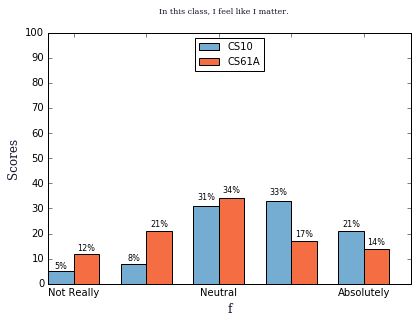

In [33]:
theCategory = '_NO_CS'
theXLabel = 'female'
genderAttr = ''
cohort = 'cs10'

i = 1
dimension = blg[i]
myFileName = 'Figures' + '/' + dimension + genderAttr + theCategory + '.pdf'




createThePlots(blg, myFileName, theCategory, genderAttr, theXLabel)
#createThePlots(clet, myFileName, theCategory, genderAttr, theXLabel)
#createThePlots(cltrcmp, myFileName, theCategory, genderAttr, theXLabel)
#createThePlots(atcs, myFileName, theCategory, genderAttr, theXLabel)
#createThePlots(atcsgender, myFileName, theCategory, genderAttr, theXLabel)
#createThePlots(atct, myFileName, theCategory, genderAttr, theXLabel)


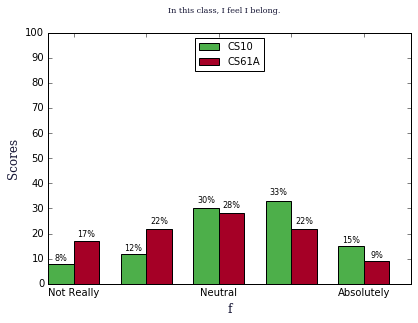

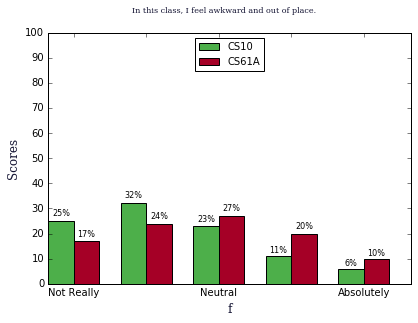

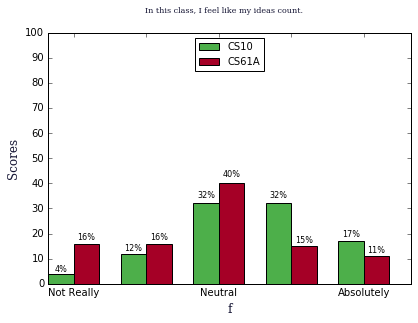

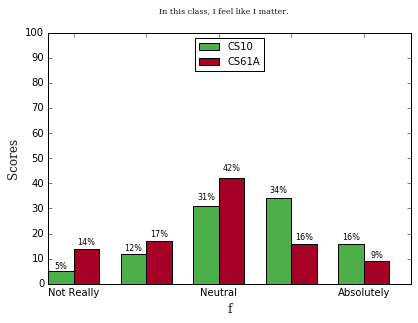

In [34]:
theCategory = '_NO_CS'
theXLabel = 'female'
genderAttr = '_female'
cohort = 'cs10'

i = 1
dimension = blg[i]
myFileName = 'Figures' + '/' + dimension + genderAttr + theCategory + '.pdf'

createTheGenderPlots(blg,myFileName,theCategory,genderAttr,theXLabel)

In [35]:
theCategory = '_CS'
theXLabel = '   '

#createThePlots(blg, theCategory, theXLabel)
#createThePlots(clet, theCategory, theXLabel)
#createThePlots(cltrcmp, theCategory, theXLabel)
#createThePlots(atcs, theCategory, theXLabel)
#createThePlots(atcsgender, theCategory, theXLabel)
#createThePlots(atct, theCategory, theXLabel)